<a href="https://colab.research.google.com/github/rajagopalmotivate1/LowlightCNNs/blob/master/Can_AI_help_humans_to_recognize_in_Low_light_Demo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Can AI help humans to recognize in Low light  


## Authors:  V Nirmala , A Rajagopal


In [ ]:
#!pip install q keras==2.2.4

# Set the brightness level  


*   BRIGHTNESSLEVEL  = 6  (synthesizes night enviornment)
*   BRIGHTNESSLEVEL  = 4  (low light)
*   BRIGHTNESSLEVEL  = 2  (dim light)
*   BRIGHTNESSLEVEL  = 1  (normal light)



In [ ]:
BRIGHTNESSLEVEL  = 4 



```

```



In [ ]:
#delete the directory named mynewfiles including its subfolders with the rm -r command 
!rm -r mynewfiles
!rm -r tempzipfolder

In [ ]:
!mkdir mynewfiles
!mkdir tempzipfolder

#  **Step 1:**  

In [ ]:
#!wget https://mendeley.figshare.com/ndownloader/files/16636247 -O dir1.rar

!wget http://kt.agh.edu.pl/~matiolanski/KnivesImagesDatabase/KnivesImagesDatabase.rar -O dir1.rar

In [ ]:
!mkdir mynewfiles/folder1
!mkdir mynewfiles/folder2


In [ ]:
!ls /tmp


In [ ]:
!ls mynewfiles

In [ ]:
!unrar x dir1.rar

In [ ]:
!ls

In [ ]:
!ls KnivesImagesDatabase/

In [ ]:
!mv KnivesImagesDatabase/POSITIVES_ALL/    Positive/

In [ ]:
!mv KnivesImagesDatabase/NEGATIVES_ALL/    Negative/

In [ ]:
!cp Negative/*.*    mynewfiles/folder1/

In [ ]:
!cp Positive/*.*    mynewfiles/folder2/

In [ ]:
!ls mynewfiles

In [ ]:
!ls mynewfiles/folder2

In [ ]:
SET_NUMBER_OF_CLASSES = 2

In [ ]:
!ls

In [ ]:
!ls mynewfiles

In [ ]:
!pwd

In [ ]:
!ls mynewfiles/folder3

In [ ]:
!ls /tmp


In [ ]:
!ls mynewfiles

In [ ]:
!mv mynewfiles/Negative mynewfiles/folder1

In [ ]:
!mv mynewfiles/Positive mynewfiles/folder2

#Goal: Just understand the high level concept 


In [ ]:
!ls mynewfiles

In [ ]:
!pwd

In [ ]:
!ls

In [ ]:
import os

ListofmyFolders = []


for i in range(SET_NUMBER_OF_CLASSES):
  ListofmyFolders.append( os.path.join('mynewfiles/folder' + str(i+1))  )
  print('total training images:', len(os.listdir(ListofmyFolders[i])))



In [ ]:
%matplotlib inline
import math as math 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 51 #@param {type:"slider", min:2, max:400, step:1}


for i in range(SET_NUMBER_OF_CLASSES):
  print('total training images:', len(os.listdir(ListofmyFolders[i])))
  rock_files = os.listdir(ListofmyFolders[i])

  next_rock = [os.path.join(ListofmyFolders[i], fname) 
                for fname in rock_files[pic_index-6:pic_index]]
  for i, img_path in enumerate(next_rock):
    #print(img_path)
    img = mpimg.imread(img_path)
    print(img_path)
    print(img.shape)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()
    imgdark = img//BRIGHTNESSLEVEL 
    plt.imshow(imgdark)
    plt.axis('Off')
    plt.show()
    


#**Step 2** Trouble shoot if the system gives error message

If you see Out of Memory error, Change the SETBATCHSIZE to lower number such as 32 instead of 128

```
```



In [ ]:
SIZE = 150

In [ ]:
SETBATCHSIZE=128

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "mynewfiles/"

datagen = ImageDataGenerator(validation_split=0.2, rescale=1./(255*1),      rotation_range=6,
     width_shift_range=0,
     height_shift_range=0,
     shear_range=0.0,
     zoom_range=0.0,
     horizontal_flip=True,                                                                
     fill_mode='nearest')

train_generator = datagen.flow_from_directory(
    TRAINING_DIR, 
    subset='training',
    target_size=(SIZE,SIZE),
         shuffle=True,     batch_size=SETBATCHSIZE,
	  class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    TRAINING_DIR,
    subset='validation',
    	target_size=(SIZE,SIZE),
         shuffle=True,     batch_size=SETBATCHSIZE,
	class_mode='categorical'
)




test_datagen = ImageDataGenerator( rescale=1./(255*1))


test_generator = test_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(SIZE,SIZE),
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

In [ ]:
x_batchtemp, y_batchtemp = next(train_generator)


In [ ]:
for i in range (20,52):
    image = x_batchtemp[i]
    #plt.imshow(image.transpose(2,1,0))
    plt.imshow(image)
    plt.show()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
from keras.applications import InceptionV3

pre_trained_model =  InceptionV3 (weights='imagenet',
                  include_top=False,
                  input_shape=(SIZE, SIZE, 3))



from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input

CLASSES = SET_NUMBER_OF_CLASSES
    
# setup model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
from keras import layers





In [ ]:
from keras import Model
#model = Model(pre_trained_model.input, x)





In [ ]:
model.summary()



In [ ]:
count = 1
for alayer in model.layers:
  print( str(count) + '    \t \t \t ' + str(alayer.name) + '    \t \t \t ' +  str(alayer.trainable) )
  count = count + 1 

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

print('No of training images   = ' + str(train_generator.n))
print('No of validation images = ' + str(validation_generator.n))
print('No of folders           = ' + str(train_generator.num_classes))

In [ ]:
#train_generator.num_classes

In [ ]:
if STEP_SIZE_VALID == 0:
  STEP_SIZE_VALID = 1

In [ ]:
#STEPSPEREPOCH = 7600 // 128
#STEPSPEREPOCH

In [ ]:
model.summary()

In [ ]:
count = 1
for alayer in model.layers:
  print( str(count) + '    \t \t \t ' + str(alayer.name) + '    \t \t \t ' +  str(alayer.trainable) )
  count = count + 1 

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
earlystopcallingback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)

In [ ]:
bestmodelcheckpoint = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=4, validation_data = validation_generator , verbose = 1, steps_per_epoch=STEP_SIZE_TRAIN, validation_steps=STEP_SIZE_VALID,
                              callbacks=[earlystopcallingback, bestmodelcheckpoint]
                              )

#model.save("rps.h5")

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

KeyError: ignored

In [ ]:
from keras.models import load_model
from keras import models


In [ ]:
layer_outputs = [layer.output for layer in model.layers]
print( layer_outputs)

print( layer_outputs[0])
print( layer_outputs[18])

In [ ]:
activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[18])

In [ ]:
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)
activations = activation_model.predict(img_tensor)


In [ ]:
import matplotlib.pyplot as plt

plt.matshow(activations[0, :, :, 3], cmap='viridis')
plt.show()

In [ ]:
activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[2])
activation_model.summary()
activations = activation_model.predict(img_tensor)
layer_activation = activations[0]


images_per_row = 8
n_features = layer_activation.shape[-1]
size = layer_activation.shape[1]


print(n_features)

n_cols = n_features // images_per_row
display_grid = np.zeros((size * n_cols, images_per_row * size))

print(n_cols)
print(display_grid.shape)

# We'll tile each filter into this big horizontal grid
if True:
  for col in range(n_cols):
    for row in range(images_per_row):
              channel_image = layer_activation[
                                               :, :,
                                               col * images_per_row + row]
              # Post-process the feature to make it visually palatable
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
             # print(channel_image.shape)
             # print(col * size)
             # print((col + 1) * size)
              display_grid[col * size : (col + 1) * size,
                           row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
  plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

In [ ]:
for layer in model.layers:
  layer.trainable = True

In [ ]:
count = 1
for alayer in model.layers:
  print( str(count) + '    \t \t \t ' + str(alayer.name) + '    \t \t \t ' +  str(alayer.trainable) )
  count = count + 1 

In [ ]:
earlystopcallingback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)

bestmodelcheckpoint = ModelCheckpoint('best_model_final.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
#model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history1 = model.fit_generator(train_generator, epochs=3, validation_data = validation_generator , verbose = 1, steps_per_epoch=STEP_SIZE_TRAIN, validation_steps=STEP_SIZE_VALID,
                              callbacks=[earlystopcallingback, bestmodelcheckpoint]
                              )

#model.save("rps.h5")

In [ ]:
import matplotlib.pyplot as plt
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

accTotal = acc + acc1
val_accTotal = val_acc + val_acc1

epochs = range(len(acc))

plt.plot( accTotal, 'r', label='Training accuracy')
plt.plot( val_accTotal, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

KeyError: ignored

In [ ]:
import math


print(  'epoch   Val Accuacy           ,      Train Accuracy'  )
for i in range(len( val_accTotal )):
  print( str(i) + '  ,      ' + str( round( 100* float( val_accTotal[i] ) , 2 ))  +    '              ,         ' + str( round( 100* float( accTotal[i] ) , 2 )) )

In [ ]:
TRAINING_DIR = "mynewfiles/"

datagen = ImageDataGenerator(validation_split=0.2, rescale=1./(255*BRIGHTNESSLEVEL),      rotation_range=60,
     width_shift_range=0.4,
     height_shift_range=0.4,
     shear_range=0.4,
     zoom_range=0.4,
     horizontal_flip=True,                                                                
     fill_mode='nearest')

train_generator = datagen.flow_from_directory(
    TRAINING_DIR, 
    subset='training',
    target_size=(SIZE,SIZE),
         shuffle=True,     batch_size=SETBATCHSIZE,
	  class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    TRAINING_DIR,
    subset='validation',
    	target_size=(SIZE,SIZE),
         shuffle=True,     batch_size=SETBATCHSIZE,
	class_mode='categorical'
)




test_datagen = ImageDataGenerator( rescale=1./(255*BRIGHTNESSLEVEL))


test_generator = test_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(SIZE,SIZE),
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

In [ ]:
higherlayers = 0
for layer in model.layers:
  higherlayers = higherlayers + 1
  if higherlayers > 20: 
    layer.trainable = False 
  else :
    layer.trainable = True 

In [ ]:
count = 1
for alayer in model.layers:
  print( str(count) + '    \t \t \t ' + str(alayer.name) + '    \t \t \t ' +  str(alayer.trainable) )
  count = count + 1 

In [ ]:
earlystopcallingback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1)

bestmodelcheckpoint = ModelCheckpoint('best_model_final.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
history2 = model.fit_generator(train_generator, epochs=3, validation_data = validation_generator , verbose = 1, steps_per_epoch=STEP_SIZE_TRAIN, validation_steps=STEP_SIZE_VALID,
                              callbacks=[earlystopcallingback, bestmodelcheckpoint]
                              )

In [ ]:
import matplotlib.pyplot as plt
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

accTotal = acc + acc1 + acc2
val_accTotal = val_acc + val_acc1 + val_acc2

epochs = range(len(acc))

plt.plot( accTotal, 'r', label='Training accuracy')
plt.plot( val_accTotal, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

KeyError: ignored

In [ ]:
for layer in model.layers:
    layer.trainable = True 


In [ ]:
history3 = model.fit_generator(train_generator, epochs=3, validation_data = validation_generator , verbose = 1, steps_per_epoch=STEP_SIZE_TRAIN, validation_steps=STEP_SIZE_VALID,
                              callbacks=[earlystopcallingback, bestmodelcheckpoint]
                              )

In [ ]:
import matplotlib.pyplot as plt
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

accTotal = acc + acc1 + acc2 + acc3
val_accTotal = val_acc + val_acc1 + val_acc2 +  val_acc3

epochs = range(len(acc))

plt.plot( accTotal, 'r', label='Training accuracy')
plt.plot( val_accTotal, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

KeyError: ignored

In [ ]:
earlystopcallingback = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)
history4 = model.fit_generator(train_generator, epochs=6, validation_data = validation_generator , verbose = 1, steps_per_epoch=STEP_SIZE_TRAIN, validation_steps=STEP_SIZE_VALID,
                              callbacks=[earlystopcallingback, bestmodelcheckpoint]
                              )

In [ ]:
import matplotlib.pyplot as plt
acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

accTotal = acc + acc1 + acc2 + acc3 + acc4
val_accTotal = val_acc + val_acc1 + val_acc2 +  val_acc3 + val_acc4

epochs = range(len(acc))

plt.plot( accTotal, 'r', label='Training accuracy')
plt.plot( val_accTotal, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import matplotlib.pyplot as plt
acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

accTotal = acc + acc1 + acc2 + acc3 + acc4
val_accTotal = val_acc + val_acc1 + val_acc2 +  val_acc3 + val_acc4

epochs = range(len(acc))

plt.plot( accTotal, 'r', label='Training accuracy')
plt.plot( val_accTotal, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import math


print(  'epoch   Val Accuacy           ,      Train Accuracy'  )
for i in range(len( val_accTotal )):
  print( str(i) + '  ,      ' + str( round( 100* float( val_accTotal[i] ) , 2 ))  +    '              ,         ' + str( round( 100* float( accTotal[i] ) , 2 )) )

#**Step 3:** Best trained neural network model is saved here.  Note it will large file, so upload it to Google Drive by mounting it..  

In [ ]:
!ls

In [ ]:
from google.colab import files


In [ ]:
#files.download("best_model_final.h5")


In [ ]:
#from google.colab import drive 
#drive.mount('/nanoaid')

# New Section

 **Final step**  
 1. Give a good name to the file 
 2. Save to file by un-commenting
 

In [ ]:
#!cp best_model_final.h5 "/content/drive/My Drive/best_model_final12DecNiRMALAFile21.h5"

In [ ]:
!ls -l * 

In [ ]:

#files.download("vggMEMSwires2.h5")


In [ ]:
!ls

In [ ]:
#files.download("vggMEMSwires.h5")

In [ ]:
#history = model.fit_generator(train_generator, epochs=4, validation_data = validation_generator , verbose = 1)


In [ ]:
test_generator.reset()


In [ ]:
#STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size

import numpy as np

predictions =model.predict_generator(test_generator, steps=10, verbose=1)
print(predictions)

predicted_class_indices=np.argmax(predictions,axis=1)
print(predicted_class_indices)

labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictionsanswers = [labels[k] for k in predicted_class_indices]



In [ ]:
predictions = model.predict_generator( train_generator , 6)



In [ ]:
print(predictions)



In [ ]:
predicted_class_indices=np.argmax(predictions,axis=-1)
print(predicted_class_indices)


In [ ]:
filenames=test_generator.filenames

print(filenames)

In [ ]:
len(filenames)

In [ ]:
for i in range(1):
 print(predictionsanswers[i] , filenames[i] ) 



#Step 4: Visvalize

Just change the slider below and then Run After this cell (Control + F10)

# Step 5: Final Predictions

In [ ]:
!rm -r mynewfilesTEST

!mkdir mynewfilesTEST
!mkdir mynewfilesTEST/folder1
!mkdir mynewfilesTEST/folder2
!mkdir mynewfilesTEST/folder3

In [ ]:
def plotsomething(plotaLAYERnumber):
  activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[18])


  from keras.preprocessing import image
  import numpy as np

  img = image.load_img(img_path, target_size=(150, 150))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  # Remember that the model was trained on inputs
  # that were preprocessed in the following way:
  img_tensor /= 255.

  # Its shape is (1, 150, 150, 3)
  print(img_tensor.shape)
  activations = activation_model.predict(img_tensor)


  activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[plotaLAYERnumber])
  activation_model.summary()
  activations = activation_model.predict(img_tensor)
  layer_activation = activations[0]

  from keras.utils import plot_model
  plot_model(activation_model, to_file='model.png')
  images_per_row = 8
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]


  print(n_features)

  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))

  print(n_cols)
  print(display_grid.shape)

  # We'll tile each filter into this big horizontal grid
  if True:
    for col in range(n_cols):
      for row in range(images_per_row):
                channel_image = layer_activation[
                                                :, :,
                                                col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              # print(channel_image.shape)
              # print(col * size)
              # print((col + 1) * size)
                display_grid[col * size : (col + 1) * size,
                            row * size : (row + 1) * size] = channel_image

      # Display the grid
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
      
  plt.show()

1
total training images: 9340
total training images: 3559
mynewfiles/folder2/12621.bmp
mynewfiles/folder2/12621.bmp
(100, 100, 3)


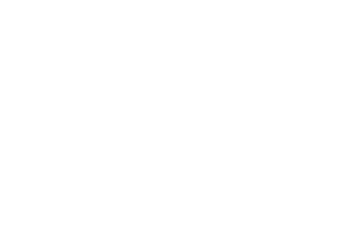

mynewfiles/folder2/12621.bmp
Found 1 images belonging to 3 classes.
Input files to AI are the following..
[[0.30354187 0.69645816]]
[1]
predicted class index is1


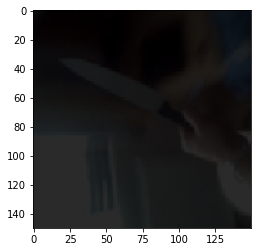

(1, 150, 150, 3)
Model: "functional_3625"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 74, 74, 32)        864       
Total params: 864
Trainable params: 864
Non-trainable params: 0
_________________________________________________________________
32
4
(296, 592)


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

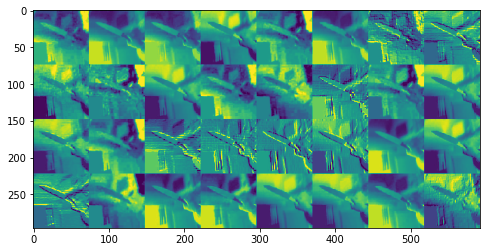

(1, 150, 150, 3)
Model: "functional_3629"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 74, 74, 32)        864       
_________________________________________________________________
batch_normalization_94 (Batc (None, 74, 74, 32)        96        
Total params: 960
Trainable params: 896
Non-trainable params: 64
_________________________________________________________________
32
4
(296, 592)


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

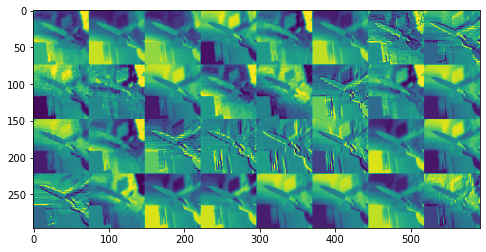

(1, 150, 150, 3)
Model: "functional_3633"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 74, 74, 32)        864       
_________________________________________________________________
batch_normalization_94 (Batc (None, 74, 74, 32)        96        
_________________________________________________________________
activation_94 (Activation)   (None, 74, 74, 32)        0         
Total params: 960
Trainable params: 896
Non-trainable params: 64
_________________________________________________________________
32
4
(296, 592)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

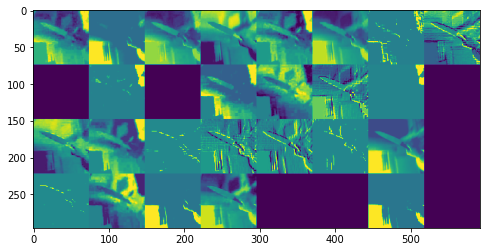

(1, 150, 150, 3)
Model: "functional_3637"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 74, 74, 32)        864       
_________________________________________________________________
batch_normalization_94 (Batc (None, 74, 74, 32)        96        
_________________________________________________________________
activation_94 (Activation)   (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 72, 72, 32)        9216      
Total params: 10,176
Trainable params: 10,112
Non-trainable params: 64
_________________________________________________________________
32
4
(288, 576)


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

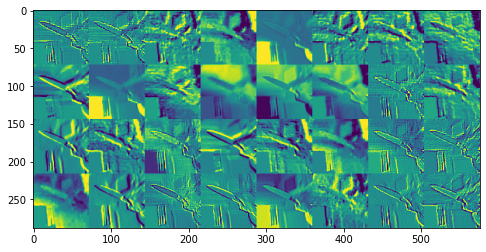

(1, 150, 150, 3)
Model: "functional_3641"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 74, 74, 32)        864       
_________________________________________________________________
batch_normalization_94 (Batc (None, 74, 74, 32)        96        
_________________________________________________________________
activation_94 (Activation)   (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 72, 72, 32)        9216      
_________________________________________________________________
batch_normalization_95 (Batc (None, 72, 72, 32)        96        
Total params: 10,272
Trainable params: 10,144
Non-trainable params: 128
____________________________

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

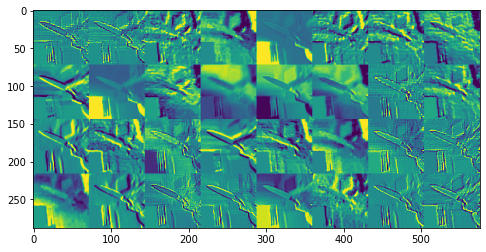

(1, 150, 150, 3)
Model: "functional_3645"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 74, 74, 32)        864       
_________________________________________________________________
batch_normalization_94 (Batc (None, 74, 74, 32)        96        
_________________________________________________________________
activation_94 (Activation)   (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 72, 72, 32)        9216      
_________________________________________________________________
batch_normalization_95 (Batc (None, 72, 72, 32)        96        
_________________________________________________________________
activation_95 (Activation)   (None

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

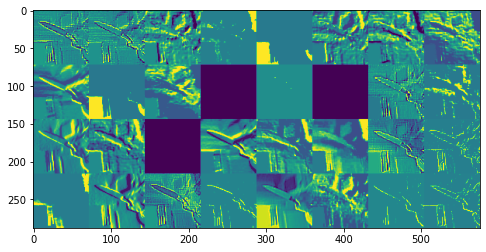

(1, 150, 150, 3)
Model: "functional_3649"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 74, 74, 32)        864       
_________________________________________________________________
batch_normalization_94 (Batc (None, 74, 74, 32)        96        
_________________________________________________________________
activation_94 (Activation)   (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 72, 72, 32)        9216      
_________________________________________________________________
batch_normalization_95 (Batc (None, 72, 72, 32)        96        
_________________________________________________________________
activation_95 (Activation)   (None

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

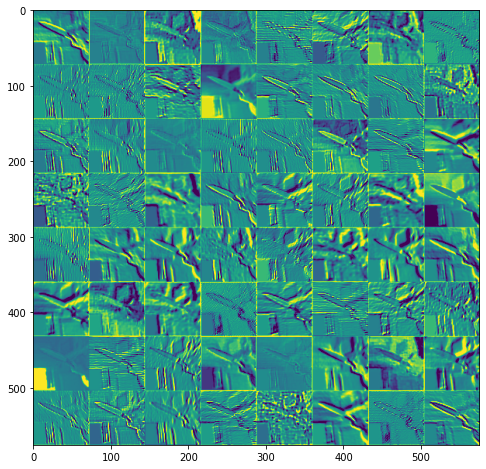

(1, 150, 150, 3)
Model: "functional_3653"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 74, 74, 32)        864       
_________________________________________________________________
batch_normalization_94 (Batc (None, 74, 74, 32)        96        
_________________________________________________________________
activation_94 (Activation)   (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 72, 72, 32)        9216      
_________________________________________________________________
batch_normalization_95 (Batc (None, 72, 72, 32)        96        
_________________________________________________________________
activation_95 (Activation)   (None

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

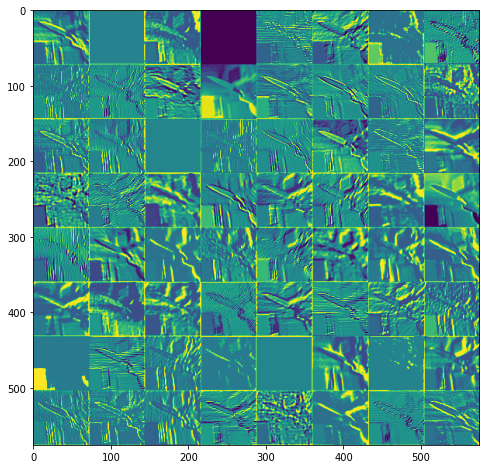

(1, 150, 150, 3)
Model: "functional_3657"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 74, 74, 32)        864       
_________________________________________________________________
batch_normalization_94 (Batc (None, 74, 74, 32)        96        
_________________________________________________________________
activation_94 (Activation)   (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 72, 72, 32)        9216      
_________________________________________________________________
batch_normalization_95 (Batc (None, 72, 72, 32)        96        
_________________________________________________________________
activation_95 (Activation)   (None

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

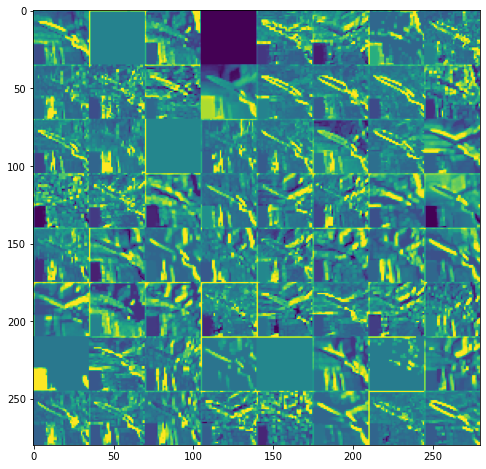

(1, 150, 150, 3)
Model: "functional_3661"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 74, 74, 32)        864       
_________________________________________________________________
batch_normalization_94 (Batc (None, 74, 74, 32)        96        
_________________________________________________________________
activation_94 (Activation)   (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 72, 72, 32)        9216      
_________________________________________________________________
batch_normalization_95 (Batc (None, 72, 72, 32)        96        
_________________________________________________________________
activation_95 (Activation)   (None

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

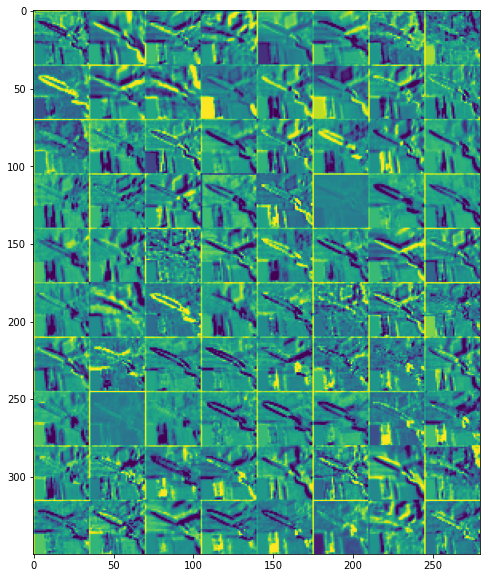

total training images: 9340
total training images: 3559
mynewfiles/folder2/12621.bmp
mynewfiles/folder2/12621.bmp
(100, 100, 3)


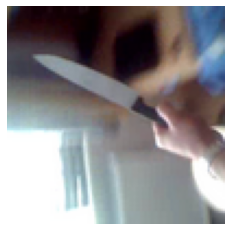

In [ ]:
#@title Select a random image to enhance. { run: "auto" }

import random 

pic_index = 178 #@param {type:"slider", min:2, max:800, step:1}


randomclass = random.randint(0, 1)


print(randomclass)
#randomclass = 0 #@param {type:"slider", min:0, max:1, step:1}


selectafile = "" 

for i in range(SET_NUMBER_OF_CLASSES):
  print('total training images:', len(os.listdir(ListofmyFolders[i])))

  if i==randomclass :
    rock_files = os.listdir(ListofmyFolders[i])


    next_rock = [os.path.join(ListofmyFolders[i], fname) 
                  for fname in rock_files[pic_index-1:pic_index]]

    for i, img_path in enumerate(next_rock):


        print(img_path)
        img = mpimg.imread(img_path)
        print(img_path)
        print(img.shape)
       # plt.imshow(img)
        plt.axis('Off')
        plt.show()
        selectafile = img_path






print(selectafile)
import shutil, os
folder = 'mynewfilesTEST/folder1/'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

newPath = shutil.copy(selectafile, 'mynewfilesTEST/folder1/')

TESTINGNEWDIR = 'mynewfilesTEST'

test_datagen = ImageDataGenerator(rescale=1./(255*6))

test_generator = test_datagen.flow_from_directory(
        TESTINGNEWDIR,
        target_size=(150, 150),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

print('Input files to AI are the following..')


predict = model.predict_generator(test_generator,steps = nb_samples)

print(predict)
predicted_class_indices=np.argmax(predict,axis=1)
print(predicted_class_indices)

labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictionsanswers = [labels[k] for k in predicted_class_indices]

print('predicted class index is' + str(predicted_class_indices[0]))

from IPython.core.display import display, HTML

x_batchtemp, y_batchtemp = next(test_generator)

for i in range (0,1):
    image = x_batchtemp[i]
    #plt.imshow(image.transpose(2,1,0))
    plt.imshow(image)
    plt.show()

if predicted_class_indices[0] == 0:
  display(HTML('<h1 >AI output : No weapons found </h1>'))

if predicted_class_indices[0] == 1:
  display(HTML('<h1 >AI output : Detected a knife </h1>'))

plotsomething(1)
plotsomething(2)
plotsomething(3)
plotsomething(4)
plotsomething(5)
plotsomething(6)
plotsomething(7)
plotsomething(9)
plotsomething(10)
plotsomething(11)


for i in range(SET_NUMBER_OF_CLASSES):
  print('total training images:', len(os.listdir(ListofmyFolders[i])))

  if i==randomclass :
    rock_files = os.listdir(ListofmyFolders[i])


    next_rock = [os.path.join(ListofmyFolders[i], fname) 
                  for fname in rock_files[pic_index-1:pic_index]]

    for i, img_path in enumerate(next_rock):


        print(img_path)
        img = mpimg.imread(img_path)
        print(img_path)
        print(img.shape)
        plt.imshow(img)
        plt.axis('Off')
        plt.show()
        selectafile = img_path

In [ ]:
plotsomething(15)


1
total training images: 9340
total training images: 3559
mynewfiles/folder2/10206.bmp
mynewfiles/folder2/10206.bmp
(100, 100, 3)


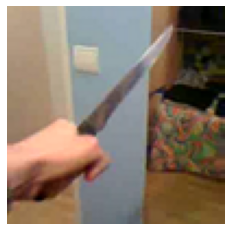

In [ ]:
#@title Select a random file to predict. { run: "auto" }

import random 

pic_index = 121 #@param {type:"slider", min:2, max:800, step:1}


randomclass = random.randint(0, 1)


print(randomclass)
#randomclass = 0 #@param {type:"slider", min:0, max:1, step:1}


selectafile = "" 

for i in range(SET_NUMBER_OF_CLASSES):
  print('total training images:', len(os.listdir(ListofmyFolders[i])))

  if i==randomclass :
    rock_files = os.listdir(ListofmyFolders[i])


    next_rock = [os.path.join(ListofmyFolders[i], fname) 
                  for fname in rock_files[pic_index-1:pic_index]]

    for i, img_path in enumerate(next_rock):


        print(img_path)
        img = mpimg.imread(img_path)
        print(img_path)
        print(img.shape)
        plt.imshow(img)
        plt.axis('Off')
        plt.show()
        selectafile = img_path


In [ ]:
from keras.utils import plot_model


In [ ]:
activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[6])
plot_model(activation_model, show_shapes=True, expand_nested=True, to_file='model.png')

In [ ]:
activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[36])
plot_model(activation_model, show_shapes=True, expand_nested=True, to_file='model.png')

In [ ]:
activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[3])
plot_model(activation_model, show_shapes=True, expand_nested=True, to_file='model.png')

In [ ]:
activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[36])
plot_model(activation_model, to_file='model.png')

Epanded analysis

In [ ]:
def plotsomethingMORE(plotaLAYERnumber):
  activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[120])


  from keras.preprocessing import image
  import numpy as np

  img = image.load_img(img_path, target_size=(150, 150))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  # Remember that the model was trained on inputs
  # that were preprocessed in the following way:
  img_tensor /= 255.

  # Its shape is (1, 150, 150, 3)
  print(img_tensor.shape)
  activations = activation_model.predict(img_tensor)


  activation_model = models.Model(inputs=layer_outputs[0], outputs=layer_outputs[plotaLAYERnumber])
  activation_model.summary()
  activations = activation_model.predict(img_tensor)
  layer_activation = activations[0]

  from keras.utils import plot_model
  plot_model(activation_model, to_file='model.png')
  images_per_row = 8
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]


  print(n_features)

  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))

  print(n_cols)
  print(display_grid.shape)

  # We'll tile each filter into this big horizontal grid
  if True:
    for col in range(n_cols):
      for row in range(images_per_row):
                channel_image = layer_activation[
                                                :, :,
                                                col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              # print(channel_image.shape)
              # print(col * size)
              # print((col + 1) * size)
                display_grid[col * size : (col + 1) * size,
                            row * size : (row + 1) * size] = channel_image

      # Display the grid
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
      
  plt.show()

In [ ]:
plotsomethingMORE(18)